# SIMULADOR DE ESTRUTURAS COM TRELIÇAS PLANAS

#### Grupo:
* Andresa Buchala do Campos Bicudo 
* Beatriz Cabral Fernandes 
* Leonardo Duarte Malta de Abreu 

## Introdução 

## Estrutura do Código 

#### Imports das funções importantes

In [16]:
# Imports das Funções
from funcoesTermosol import *
from funcoes_aps3 import *
import pandas as pd

#### Importando dados do arquivo de entrada 

In [2]:
#importando os dados
[nn,N,nm,Inc,nc,F,nr,R] = importa('entrada-g5.xlsx')

#Modulo de elasticidade
E = Inc[0,2]

#Area secao transversal
A = Inc[0,3]

print(f"""O módulo de elasticidade das treliças é: {E} kPa. A área de seção trnavesal dessas treliças é {A} m2""")

O módulo de elasticidade das treliças é: 210000000000.0 kPa. A área de seção trnavesal dessas treliças é 0.07068583470577035 m2


#### Plotando o esquema do arquivo de entrada
![Screenshot](fotos/diagrama.png)

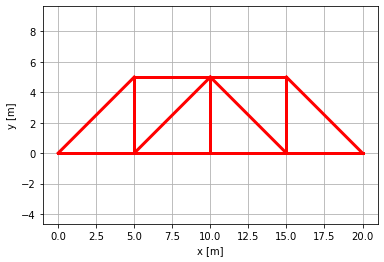

In [3]:
plota(N,Inc)

#### Criando matriz de conectividade

In [4]:
# Calculando matriz de conectividade
C = conectividade(Inc, nn, nm)
C

array([[-1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -1.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -1.,  0.,  0.,  1., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -1., -1.,  0., -1., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0., -1., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]])

#### Calculando a Matriz dos Membros 

In [5]:
# Calcula matriz dos membros
M = membros(N,C)
M

array([[ 5.,  0., -5.,  5.,  0., -5.,  5.,  5.,  5.,  5.,  0.,  5.,  5.],
       [ 5., -5.,  0.,  0., -5., -5.,  0.,  0., -5.,  0., -5., -5.,  0.]])

#### Calculando a Matriz de comprimento para cada elemento

In [6]:
# Calcula o comprimento de cada elemento
l = calcula_l(M)
l

array([[7.07106781],
       [5.        ],
       [5.        ],
       [5.        ],
       [5.        ],
       [7.07106781],
       [5.        ],
       [5.        ],
       [7.07106781],
       [5.        ],
       [5.        ],
       [7.07106781],
       [5.        ]])

#### Calculando a Matriz trigonométrica

In [7]:
# Calcula matriz dos senos e cossenos
trig = calcula_trig(N,M,l)
trig

array([[-0.70710678, -0.70710678,  0.70710678,  0.70710678],
       [-0.        ,  1.        ,  0.        , -1.        ],
       [ 1.        , -0.        , -1.        ,  0.        ],
       [-1.        , -0.        ,  1.        ,  0.        ],
       [-0.        ,  1.        ,  0.        , -1.        ],
       [ 0.70710678,  0.70710678, -0.70710678, -0.70710678],
       [-1.        , -0.        ,  1.        ,  0.        ],
       [-1.        , -0.        ,  1.        ,  0.        ],
       [-0.70710678,  0.70710678,  0.70710678, -0.70710678],
       [-1.        , -0.        ,  1.        ,  0.        ],
       [-0.        ,  1.        ,  0.        , -1.        ],
       [-0.70710678,  0.70710678,  0.70710678, -0.70710678],
       [-1.        , -0.        ,  1.        ,  0.        ]])

#### Calculando Matriz de Rigidez Sem condições de Contorno

In [8]:
#Calcula matriz de rigidez global e de cada elemento
Kg,Ke = calcula_Ke(C,M,E,A,nn)
Kg

array([[ 4.01843615e+09,  1.04963109e+09, -1.04963109e+09,
        -1.04963109e+09, -2.96880506e+09,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.04963109e+09,  1.04963109e+09, -1.04963109e+09,
        -1.04963109e+09,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-1.04963109e+09, -1.04963109e+09,  4.01843615e+09,
         1.04963109e+09,  0.00000000e+00,  0.00000000e+00,
        -2.96880506e+09,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-1.04963109e+09, -1.04963109e

#### Criando Matriz de Rigidez com as Condições de Contorno Aplicadas 

In [9]:
# Matriz de rigidez global com condicoes de contorno aplicadas
Kg_cc = aplica_cc(Kg,R)
Kg_cc

array([[ 4.01843615e+09,  1.04963109e+09,  0.00000000e+00,
        -2.96880506e+09,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.04963109e+09,  4.01843615e+09,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  6.98724121e+09,
        -1.04963109e+09, -1.04963109e+09, -2.96880506e+09,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-2.96880506e+09,  0.00000000e+00, -1.04963109e+09,
         8.03687230e+09,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.04963109e+09, -2.96880506e+09,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.04963109e+09,
         0.00000000e+00,  5.06806725e+09,  0.00000000e+00,
        -2.96880506e+09,  1.04963109e+09,  0.00000000e+00,
         0.

#### Criando Vetor de Forças com as Confições de Contorno Aplicadas 

In [10]:
# Vetor de Forcas com condicoes de contorno
F_cc = aplica_cc(F,R)
F_cc

array([[     0.],
       [-40000.],
       [     0.],
       [     0.],
       [-60000.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [-40000.]])

#### Calculando os Deslocamentos Pelo Método de Jacobi 

In [11]:
# Calcula deslocamentos
u = calcula_jacobi(Kg_cc, F_cc, 1e-5)
u

CONVERGIU EM i=50 com err = [6.85613535e-06]


C:\Users\user\Documents\Insper\5-semestre\Transmecsol\aps3-transmecsol\funcoes_aps3.py:98: RuntimeWarning: invalid value encountered in true_divide
  err = max(abs((xnew-x)/xnew))


array([[ 2.79043962e-06],
       [-1.06829947e-05],
       [-5.05243946e-06],
       [ 0.00000000e+00],
       [-3.36335837e-05],
       [ 0.00000000e+00],
       [-3.36333531e-05],
       [ 5.05243946e-06],
       [-2.79043962e-06],
       [-1.06829947e-05]])

#### Completando a Matriz de deslocamentos 

![Screenshot](fotos/diagrama.png)

In [31]:
# Matriz de deslocamentos completa (sem condicoes de contorno)
u_comp = calcula_u_comp(u,R)
nos = []
deslocamentos_x = []
deslocamentos_y = []
for i in range(len(u_comp)):
    if i%2 == 0:
        deslocamentos_x.append(u_comp[i])
        nos.append(int(i/2+1))
    else:
        deslocamentos_y.append(u_comp[i])
        
deslocamentos_nodais = pd.DataFrame()
deslocamentos_nodais['Nodes'] = nos
deslocamentos_nodais['Displacement in X'] = deslocamentos_x
deslocamentos_nodais['Displacement in Y'] = deslocamentos_y

deslocamentos_nodais

,Nodes,Displacement in X,Displacement in Y
0,1,[0.0],[0.0]
1,2,[2.7904396168203672e-06],[-1.068299471900146e-05]
2,3,[-5.0524394627626485e-06],[0.0]
3,4,[0.0],[-3.363358370439688e-05]
4,5,[0.0],[-3.363335310799454e-05]
5,6,[5.0524394627626485e-06],[0.0]
6,7,[-2.7904396168203672e-06],[-1.068299471900146e-05]
7,8,[0.0],[0.0]


#### Calculando Reações de Apoio as Deformações, Tensões e Forças Internas

In [35]:
#Calcula as reacoes de apoio
r_apoio = calcula_r_apoio(Kg, u_comp, R)
r_apoio_df = pd.DataFrame()
r_apoio_df['Nodes'] = ['1x', '1y', '3y', '6y', '8x', '8y']
r_apoio_df['Reaction Forces'] = r_apoio
r_apoio_df

,Nodes,Reaction Forces
0,1x,23283.979078
1,1y,8284.271247
2,3y,61715.386455
3,6y,61715.386455
4,8x,-23283.979078
5,8y,8284.271247


In [44]:
# Calcula deformacoes
d = calcula_deformacao(Inc,u_comp,l,R,trig)
#Calcula tensoes
t = calcula_tensao(E,d)
F_interno = A*t 


df_informacoes = pd.DataFrame()
elementos = []
for i in range(nm):
    elementos.append(i+1)

df_informacoes['Element'] = elementos
df_informacoes['Deformation'] = d
df_informacoes['Tensile Force'] = F_interno
df_informacoes['Longitudinal Stress'] = t
df_informacoes

,Element,Tensile Force,Longitudinal Stress
0,1,-11715.728753,-165743.657146
1,2,-31715.728753,-448685.778198
2,3,-14999.707830,-212202.457436
3,4,-8284.271247,-117198.463906
4,5,-0.684596,-9.685049
5,6,-42425.922789,-600204.029074
6,7,14999.707830,212202.457436
7,8,-8284.271247,-117198.463906
8,9,-42425.922789,-600204.029074
9,10,14999.707830,212202.457436


#### Plotando gráfico com a deformação do problema (Ampliado em 1000 vezes)

#### Gerando Saída txt com informações relevantes

In [14]:
geraSaida("saida-final", r_apoio, u_comp, d, F_interno, t)

## Conclusão 

## Referências 